In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
import random
import statistics

from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("./star_classification.csv")

In [3]:
df.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


<Axes: xlabel='class'>

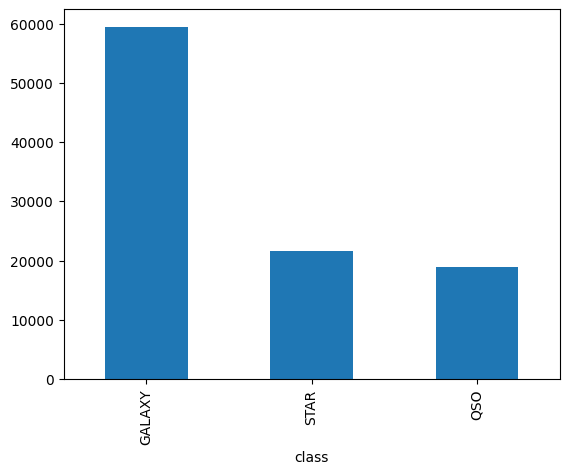

In [4]:
counts = df['class'].value_counts()
counts.plot.bar()

In [5]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
# -9999 look like placeholders for out of range data, figure what to do with these?
# rerun ID are all identical, just remove?


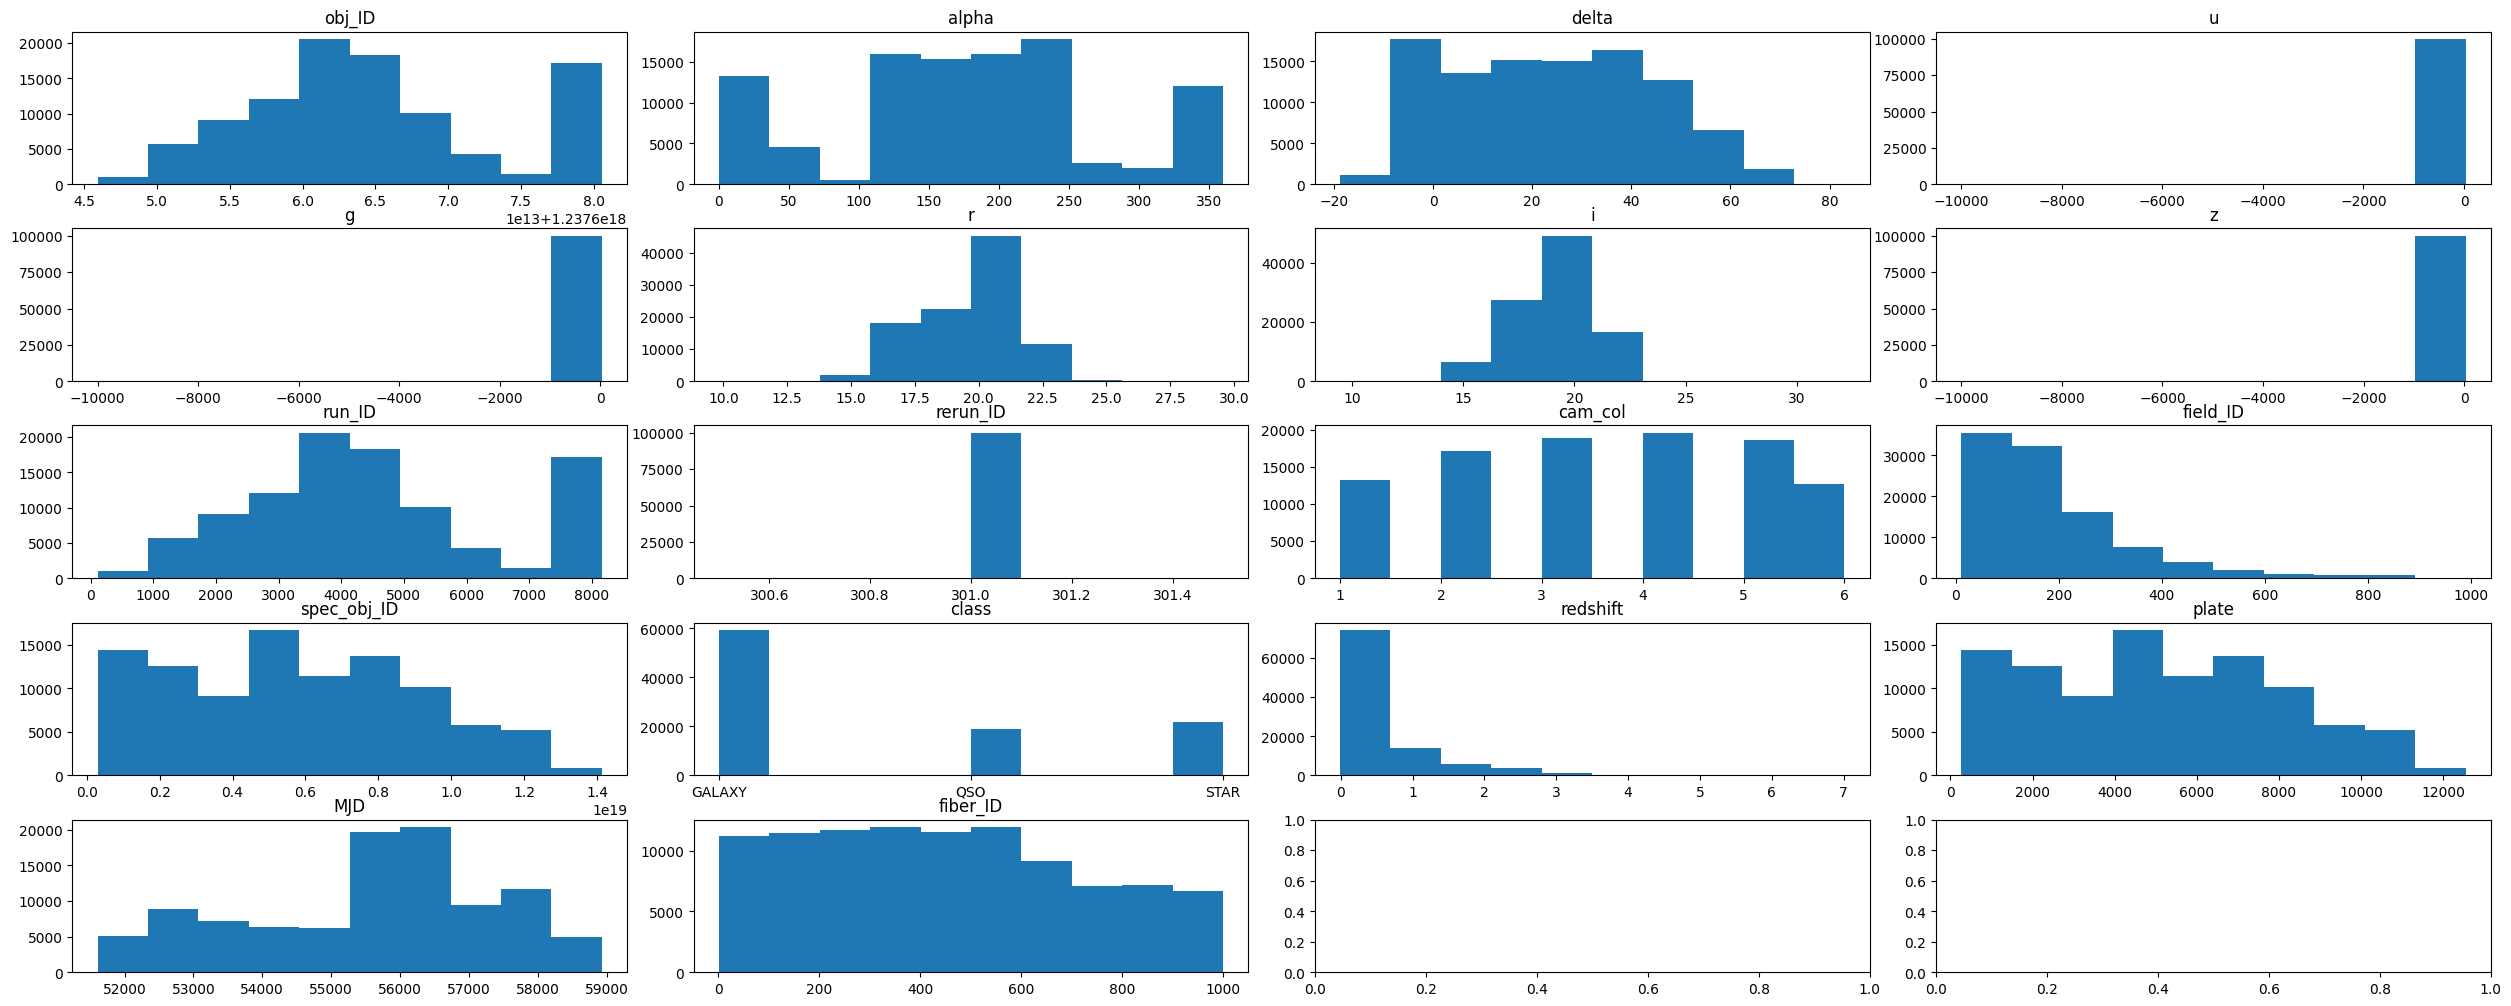

In [7]:
fig, axes = plt.subplots(nrows = math.ceil(len(df.columns)/4), ncols = 4, figsize = (25, 10))

fig.tight_layout()
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col])
    axes[i].set_title(col)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [9]:
## Dummy classification for dummy baseline

df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [10]:
df['class'].value_counts(normalize = True)

class
GALAXY    0.59445
STAR      0.21594
QSO       0.18961
Name: proportion, dtype: float64

In [11]:
# Probabilities for random selection
classes = ["GALAXY", "STAR", "QSO"]
proba = [.59, .22, .19]

In [19]:
dummy_baseline_distribution = []

for i in range(0, 100):
    preds = [random.choices(classes, weights=proba)[0] for i in range(0, 100000)]
    dummy_baseline_distribution.append((df['class'] != preds).astype(int).sum() / 100000)

# Get SD and mean for 100 prediction sets

In [20]:
print(statistics.stdev(dummy_baseline_distribution), statistics.mean(dummy_baseline_distribution))

0.0013384123377564122 0.5657733


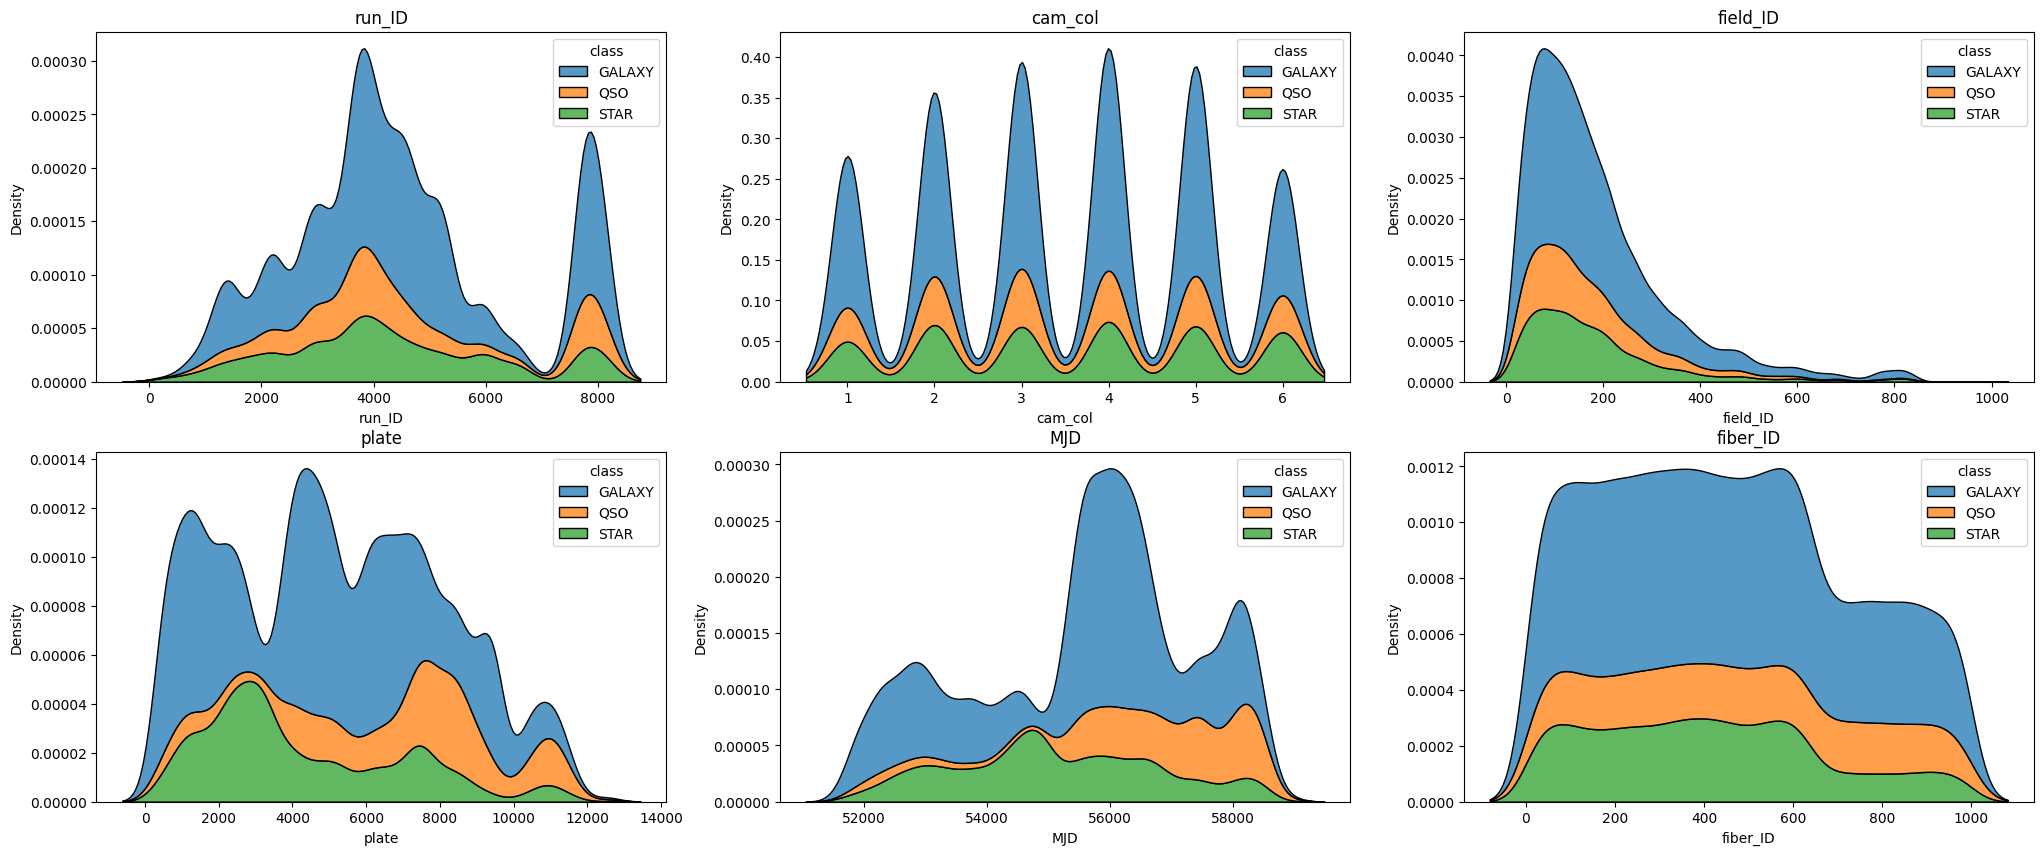

In [ ]:
# For variables which I do not think are useful, plot the histograms of each class over them to see if it looks like there is actually a difference

fig, axes = plt.subplots(2, 3, figsize = (25, 10))
axes = axes.flatten()

for i, col in enumerate(["run_ID", "cam_col", "field_ID", "plate", "MJD", "fiber_ID"]):
    ax = axes[i]
    sns.kdeplot(data=df, x=col, hue='class', multiple="stack", ax=ax)
    ax.set_title(col)


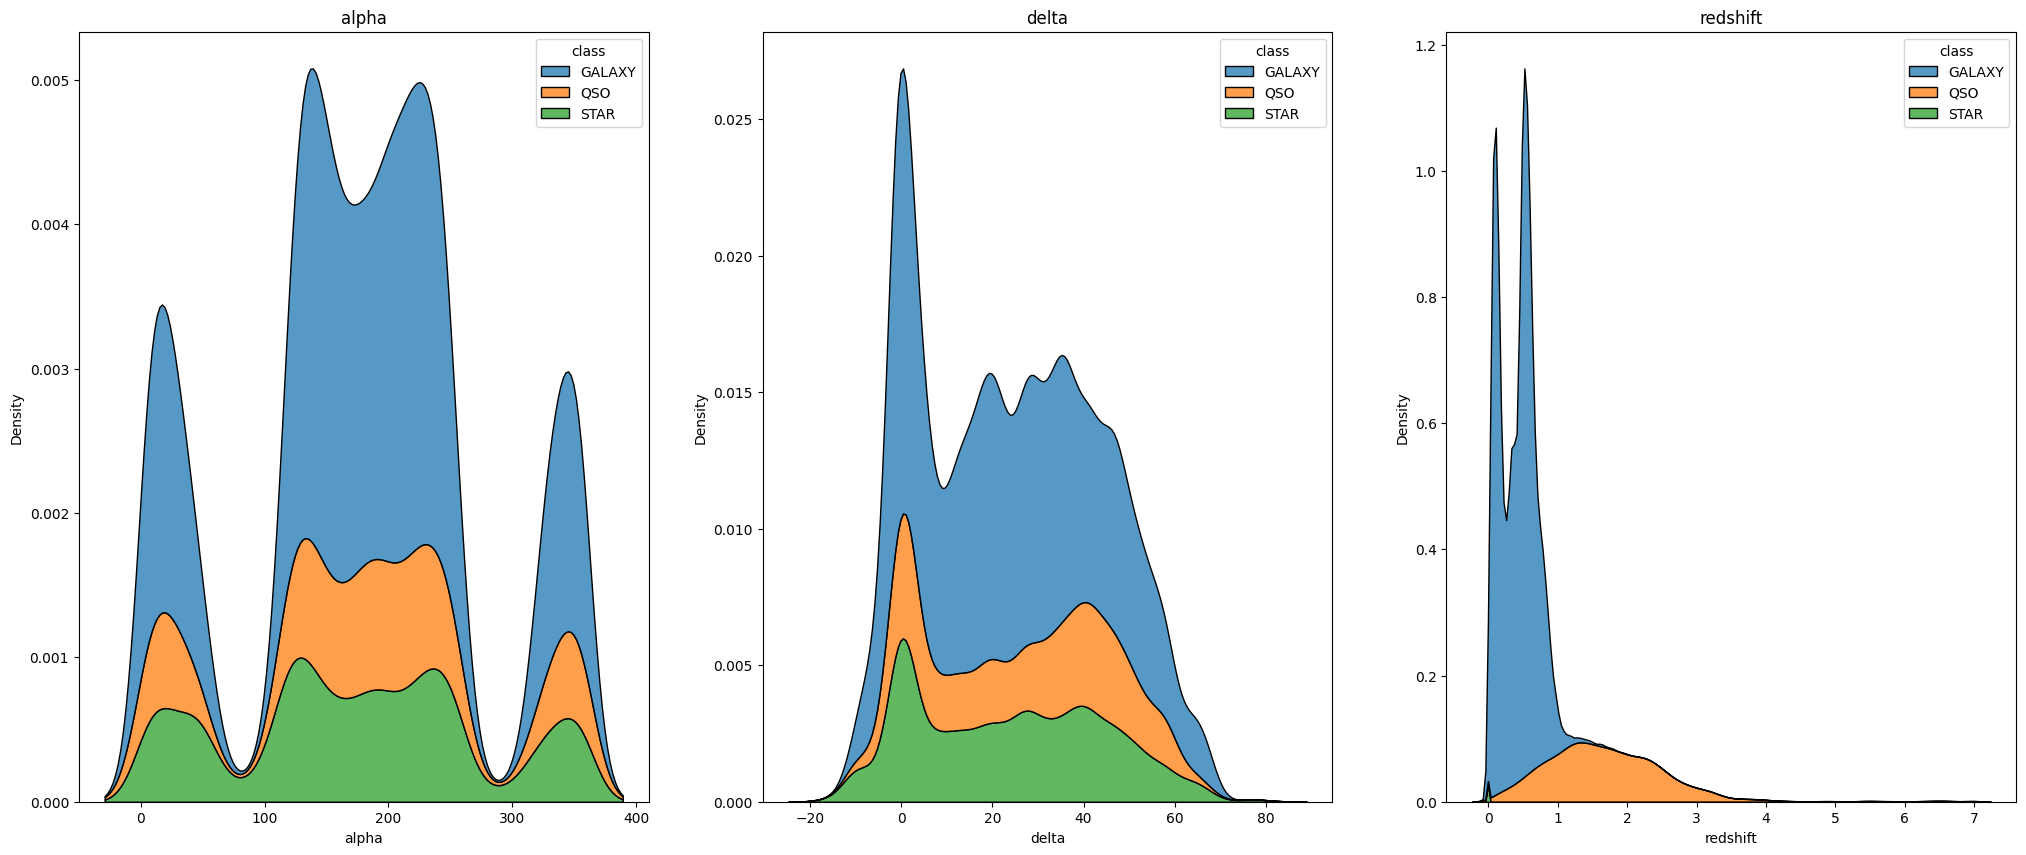

In [16]:
# Coordinates should not make a difference either, neither should redshift? 

fig, axes = plt.subplots(1, 3, figsize = (25, 10))
axes = axes.flatten()

for i, col in enumerate(["alpha", "delta", "redshift"]):
    ax = axes[i]
    sns.kdeplot(data=df, x=col, hue='class', multiple="stack", ax=ax)
    ax.set_title(col)


# Redshift actually does make a difference - this makes sense as galaxies are larger than stars, so we expect to see more of them at a larger distance. Furthermore, quasars were more common in the early universe, hence we see them become the most prominent at higher redshift values

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_8052/1527920141.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[col] = temp_df[col].clip(lower=0)
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_8052/1527920141.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[col] = temp_df[col].clip(lower=0)
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_8052/1527920141.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

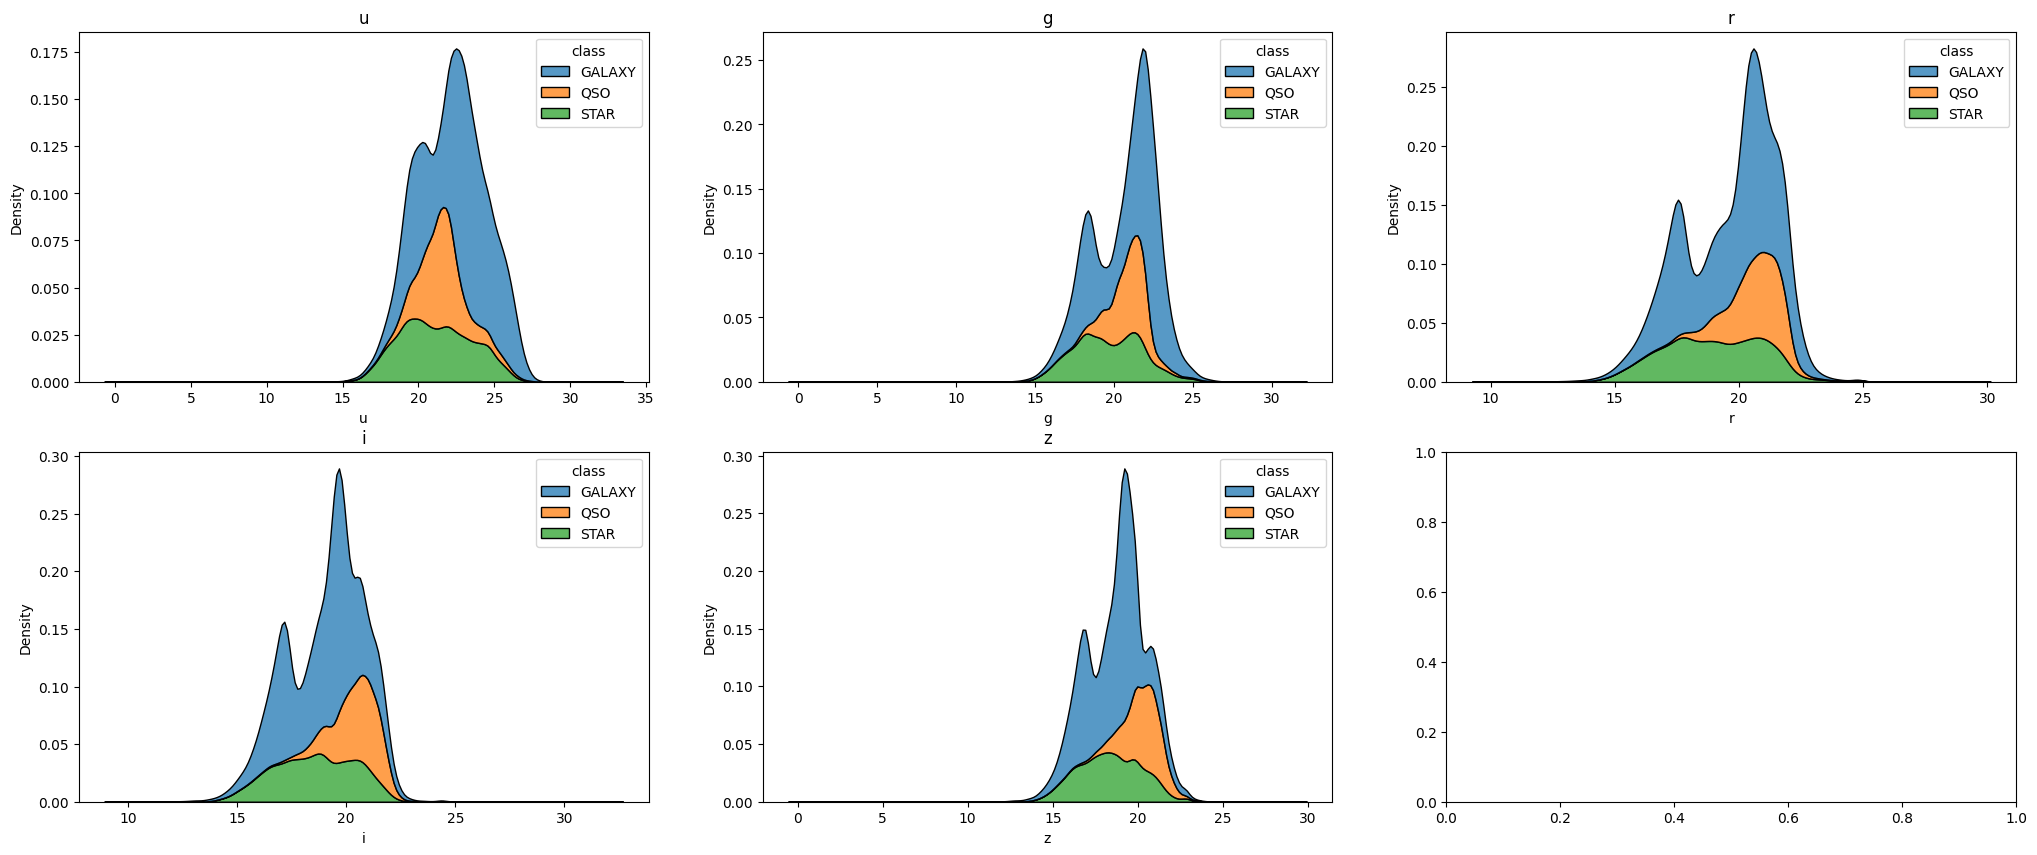

In [17]:
# These are the spectroscopic data which we assume should be important

fig, axes = plt.subplots(2, 3, figsize = (25, 10))
axes = axes.flatten()

spectro_cols = ["u", "g", "r", "i", "z"]

for i, col in enumerate(spectro_cols):
    temp_df = df[[col, "class"]]
    temp_df[col] = temp_df[col].clip(lower=0)
    ax = axes[i]
    sns.kdeplot(temp_df, x=col, hue='class', multiple="stack", ax=ax)
    ax.set_title(col)

<Axes: xlabel='spec_obj_ID', ylabel='Density'>

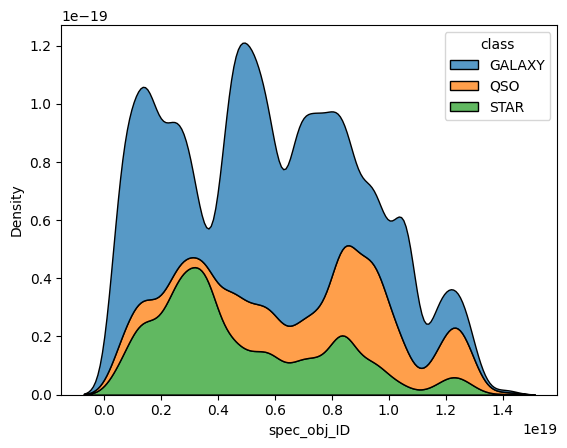

In [18]:
# For spectroscopic ID, would it be necessary to consider whether it makes sense to take the highest confidence prediction and broadcast it to other objs with the same spectroscopic ID

# Galaxy is inconsistent enough where spectroscopic object ID should not just be ignored.

# Combining prediction for obs. with the same spec. ID may improve performance/simplify ML task anyway

sns.kdeplot(df, x="spec_obj_ID", hue='class', multiple='stack')